# Projet

Pour rappel, cet examen est à réaliser par groupes d'au plus trois étudiants.

Vous devez télécharger et utiliser le jeu de données suivant : MP-4MLSP.csv (source : kaggle).

Il contient les résultats d'une enquête de satisfaction menée auprès des clients d'une compagnie aérienne.

Voici la signification des différentes variables :

- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level (satisfied, neutral, dissatisfied)
- Price: the flight price
-
Votre rendu se fera sous la forme d'un Notebook Python (code source et export au format PDF ou HTML).

Tous les graphiques, calculs, transformations, implémentations d'algorithmes, etc. devront être introduits, justifiés et interprétés. Une rédaction professionnelle est attendue. Elle constituera une part non négligeable du barème.

Le but de ce projet est d'effectuer des prévisions sur les variables 'Satisfaction' et 'Price".

**1- Mener de façon complète une analyse exploratoire des données : graphiques, paramètres, tests, etc.**


**2- Classification sur la variable "Satisfaction" :**

a. Compléter l'analyse exploratoire de la question 1 en se focalisant sur les relations des différentes variables avec la variable cible.

b. Prétraiter les données : choisir les variables explicatives (essayer plusieurs sélections), procéder à l'imputation des valeurs manquantes (tester plusieurs stratégies), normaliser les variables, etc.

c. Appliquer les différents algorithmes étudiés en cours. Pour chacun d'eux on procèdera ainsi : définition d'un dictionnaire d'hyperparamètres, recherche exhaustive (ou aléatoire) des meilleurs hyperparamètres, établissement de la matrice de confusion, calculs des différentes métriques (exactitude, précision, rappel, F1 score, auc, etc.).

d. Comparer les différents algorithmes.


**3- Classification sur une variable dérivée de la variable "Satisfaction" :**

a. Créer une variable binaire à partir la variable "Satisfaction" : on regroupera les observations des classes "Neutral" et "dissatisfied" en une seule classe.

b. Reprendre les étapes de la question 2 avec cette nouvelle variable comme variable cible.


**4- Régression sur la variable "Price" :**

a. Compléter l'analyse exploratoire de la question 1 en se focalisant sur les relations des différentes variables avec la variable cible.

b. Prétraiter les données : choisir les variables explicatives (essayer plusieurs sélections), procéder à l'imputation des valeurs manquantes (tester plusieurs stratégies), normaliser les variables, etc.

c. Appliquer les différents algorithmes étudiés en cours. Pour chacun d'eux on procèdera ainsi : définition d'un dictionnaire d'hyperparamètres, recherche exhaustive (ou aléatoire) des meilleurs hyperparamètres, calculs des différentes métriques (MSE, MAE, etc.).

d. Comparer les différents algorithmes.

In [393]:
# Imports

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler
import seaborn as sns
from sklearn.impute import SimpleImputer

# Chargement du dataset

df = pd.read_csv("project.csv")

## 3-a. Créer une variable binaire à partir la variable "Satisfaction" : on regroupera les observations des classes "Neutral" et "dissatisfied" en une seule classe.

In [394]:
df['bin_satisfaction'] = df['satisfaction'].replace({
    'dissatisfied': 0,
    'neutral': 0,
    'satisfied': 1
})

print(df["bin_satisfaction"].value_counts())

pd.DataFrame(df).to_csv(f"./df_bin_satisfaction.csv", index=False)

bin_satisfaction
0    73452
1    56428
Name: count, dtype: int64


## 1- Mener de façon complète une analyse exploratoire des données : graphiques, paramètres, tests, etc.

### Informations générales sur le dataset avec les méthodes usuelles

In [395]:
#Informations générales


print("\n\nNombre d'observations et de variables")
print(df.shape)
print("\n\n------------------------------------------------------------------------")
print("\n\nTypes des variables")
print(df.dtypes)
print("\n\n------------------------------------------------------------------------")
print("\n\nValeurs manquantes (nulles)")
print(df.isnull().sum())
print("\n\n------------------------------------------------------------------------")
print("\n\nValeurs manquantes (na)")
print(df.isnull().sum())
print("\n\n------------------------------------------------------------------------")
print("\n\nCalculs de base")
print(df.describe())
print("\n\n------------------------------------------------------------------------")
print("\n\nInformations de base sur le dataset")
print(df.info())
print("\n\n------------------------------------------------------------------------")
print("Premières observations du dataframe")
print(df.head())



Nombre d'observations et de variables
(129880, 27)


------------------------------------------------------------------------


Types des variables
Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                  float64
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking               float64
Gate location                        float64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                     float64
Baggage handling                       i

### Typer les variables


- Gender: Gender of the passengers (Female, Male) - bin
- Customer Type: The customer type (Loyal customer, disloyal customer) - bin
- Age: The actual age of the passengers - num
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel) - bin
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus) - ord
- Flight distance: The flight distance of this journey - num
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) - ord / 0 à traiter à part
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient - ord (0 à 5)
- Ease of Online booking: Satisfaction level of online booking - ord
- Gate location: Satisfaction level of Gate location - ord (0 - 5)
- Food and drink: Satisfaction level of Food and drink - ord (0 - 5)
- Online boarding: Satisfaction level of online boarding - ord (0 - 5)
- Seat comfort: Satisfaction level of Seat comfort - ord (0 - 5)
- Inflight entertainment: Satisfaction level of inflight entertainment - ord (0 - 5)
- On-board service: Satisfaction level of On-board service - ord (0 - 5)
- Leg room service: Satisfaction level of Leg room service - ord (0 - 5)
- Baggage handling: Satisfaction level of baggage handling - ord (0 - 5)
- Checkin service: Satisfaction level of Check-in service - ord (0 - 5)
- Inflight service: Satisfaction level of inflight service - ord (0 - 5)
- Cleanliness: Satisfaction level of Cleanliness - ord (0 - 5)
- Departure Delay in Minutes: Minutes delayed when departure - num
- Arrival Delay in Minutes: Minutes delayed when Arrival -num
- Satisfaction: Airline satisfaction level (satisfied, neutral, dissatisfied) - cat ['dissatisfied' 'satisfied' 'neutral']
- Price: the flight price - num

In [396]:
variables_to_remove = ["Unnamed: 0", "id"]
bin_variables = ["Gender", "Customer Type", "Type of Travel" ]
num_variables = [ "Leg room service", "Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes", "Inflight service", "Inflight wifi service", "On-board service", "Checkin service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Baggage handling", "Seat comfort", "Inflight entertainment", "Cleanliness"]
ord_variables = ["Class"]
targets= ["satisfaction", "Price", "bin_satisfaction"]

#Just for visualization
cat_variables= ["Gender", "Customer Type", "Type of Travel", "Leg room service", "Inflight wifi service", "Inflight service", "Departure/Arrival time convenient", "Ease of Online booking", "On-board service", "Checkin service", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "Baggage handling", "Cleanliness", "Class"]

### Supprimer les colonnes inutiles

In [397]:
# Variables contenues dans la liste variables_to_remove

df = df.drop(variables_to_remove, axis=1)

### Analyse générale

##### Variables catégorielles non numériques

- Piecharts de la distribution des variables catégorielles  

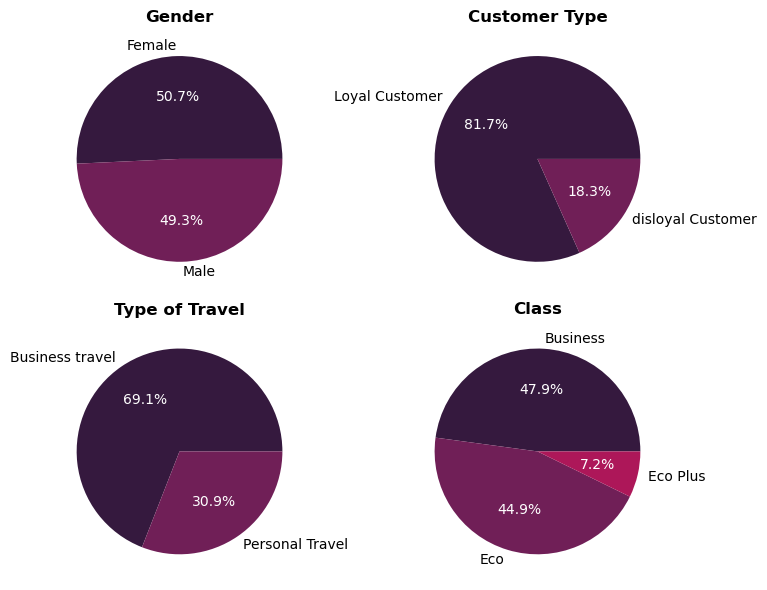

In [398]:
no_num_cat_variables = [var for var in cat_variables if var not in num_variables]

colors = sns.color_palette("rocket", 6)

# Configuration pour deux graphiques par ligne
n_cols = 2
n_rows = (len(no_num_cat_variables) + n_cols - 1) // n_cols  # Calcul pour obtenir le nombre nécessaire de lignes

fig, ax = plt.subplots(n_rows, n_cols, figsize=(8, 3 * n_rows))  # Ajustez la hauteur si nécessaire
ax = ax.flatten()  # Aplatir le tableau d'axes si nécessaire

for i in range(len(no_num_cat_variables)):
    # Calcul des comptages de valeur
    value_counts = df[no_num_cat_variables[i]].value_counts()
    # Génération des indices pour les couleurs basées sur la longueur des catégories présentes
    num_colors = len(value_counts)
    # Sélection des couleurs
    selected_colors = colors[:num_colors]  # Assure que le nombre de couleurs est adéquat pour les catégories
    
    _, _, autotexts = ax[i].pie(value_counts, 
              labels=value_counts.index,
              colors=selected_colors,  # Utilisation des couleurs sélectionnées
              textprops={'fontsize': 10, 'color': 'black'}, 
              autopct='%1.1f%%'
              )
    for autotext in autotexts:
        autotext.set_color('white')
    ax[i].set_title(no_num_cat_variables[i], fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()



- transformer les variables qualitatives en variables numériques

In [399]:
# # Afficher les valeurs possibles pour chaque variable qualitative
# unique_values = {}

# for column in ["satisfaction"]:
#     unique_values[column] = df_analysis[column].unique()

# # Afficher les valeurs uniques pour chaque colonne qualitative
# for column, values in unique_values.items():
#     print(f"Valeurs uniques pour {column}: {values}")
#     print("\n")
#     print("---------")

In [400]:
from sklearn.preprocessing import OneHotEncoder

df_analysis = df.copy()

class_encoder = OrdinalEncoder(categories=[["Eco", "Eco Plus", "Business"]])
df_analysis["Class"] = class_encoder.fit_transform(df_analysis[["Class"]])

satisfaction_encoder = OrdinalEncoder(categories=[['dissatisfied', 'satisfied', 'neutral']])
df_analysis["satisfaction"] = satisfaction_encoder.fit_transform(df_analysis[["satisfaction"]])

# Mappage pour les variables binaires
gender_mapping = {'Male': 0, 'Female': 1}
travel_type_mapping = {'Business travel': 1, 'Personal Travel': 0}
customer_type_mapping = {'Loyal Customer': 1, 'disloyal Customer': 0}

df_analysis['Gender'] = df_analysis['Gender'].map(gender_mapping, na_action='ignore')  # Ajouté na_action pour gestion de NaN
df_analysis['Type of Travel'] = df_analysis['Type of Travel'].map(travel_type_mapping, na_action='ignore')
df_analysis['Customer Type'] = df_analysis['Customer Type'].map(customer_type_mapping, na_action='ignore')

print(df_analysis.dtypes)

Gender                                 int64
Customer Type                          int64
Age                                  float64
Type of Travel                         int64
Class                                float64
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking               float64
Gate location                        float64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                     float64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

Toutes les variables explicatives sont numériques.

##### Variables numériques

- Courbes de distribution des variables explicatives numériques seulement

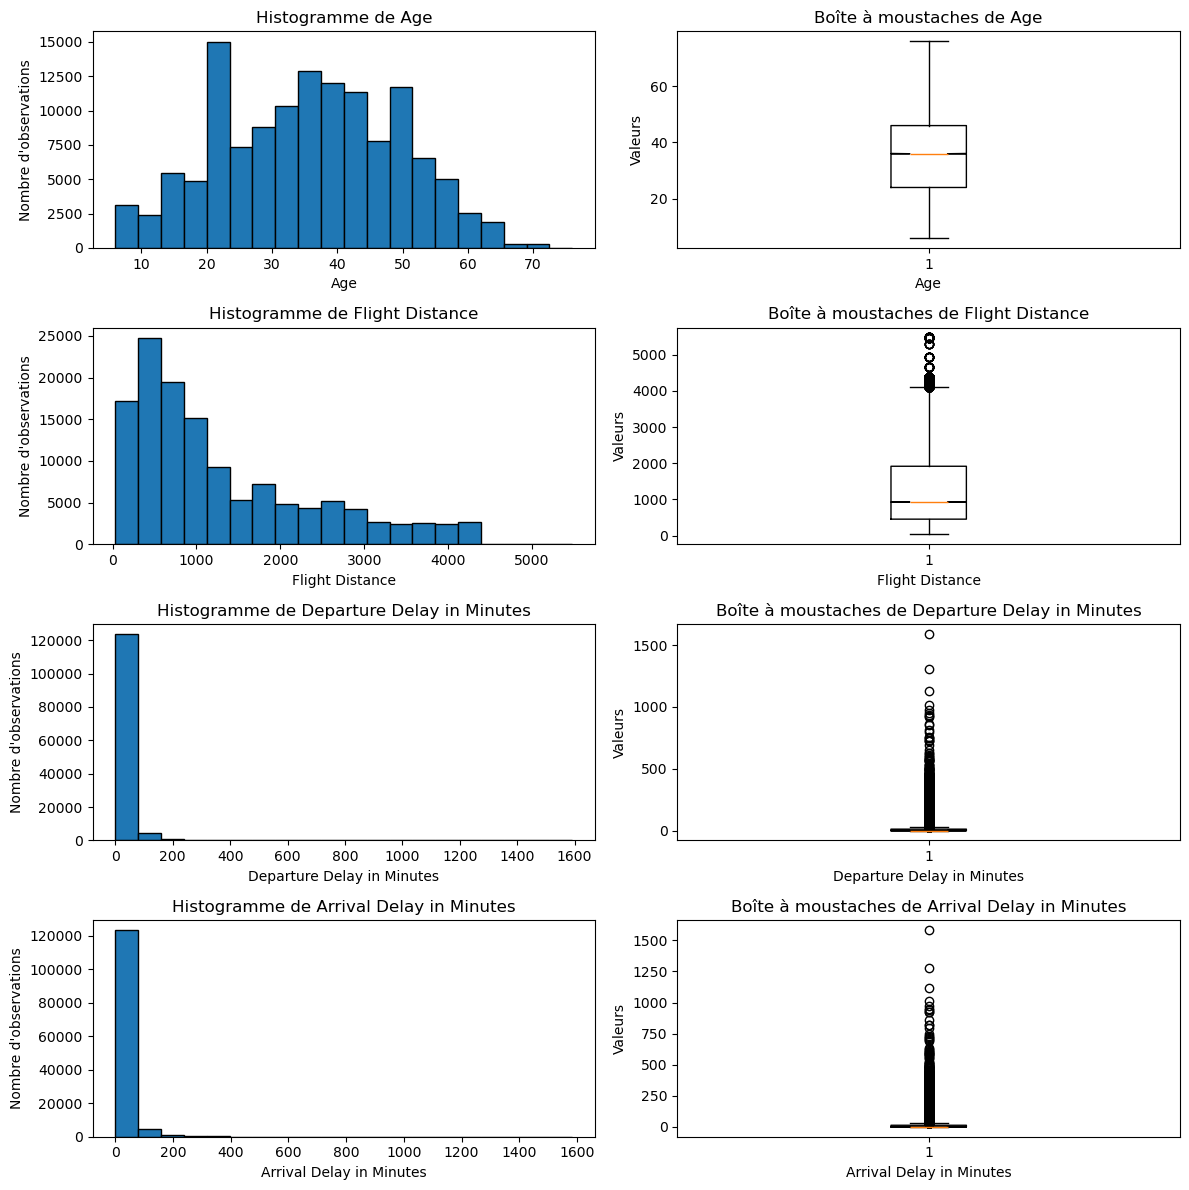

In [401]:
# Numerical no categorical variables

no_cat_num_variables = [var for var in num_variables if var not in cat_variables]

n_cols = 2  
n_rows = len(no_cat_num_variables)  # Une ligne par variable

plt.figure(figsize=(6 * n_cols, 3 * n_rows))

for i, col in enumerate(no_cat_num_variables):
    # Histogramme
    plt.subplot(n_rows, n_cols, 2 * i + 1)  # Position impaire pour les histogrammes
    plt.hist(df_analysis[col].dropna(), edgecolor="black", bins=20)
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")
    
    # Boîte à moustaches
    plt.subplot(n_rows, n_cols, 2 * i + 2)  # Position paire pour les boîtes à moustaches
    plt.boxplot(df_analysis[col].dropna(), notch=True, vert=True)
    plt.title(f'Boîte à moustaches de {col}')
    plt.xlabel(col)
    plt.ylabel("Valeurs")

plt.tight_layout()
plt.show()

- Courbes de distribution des variables explicatives numériques et catégorielles

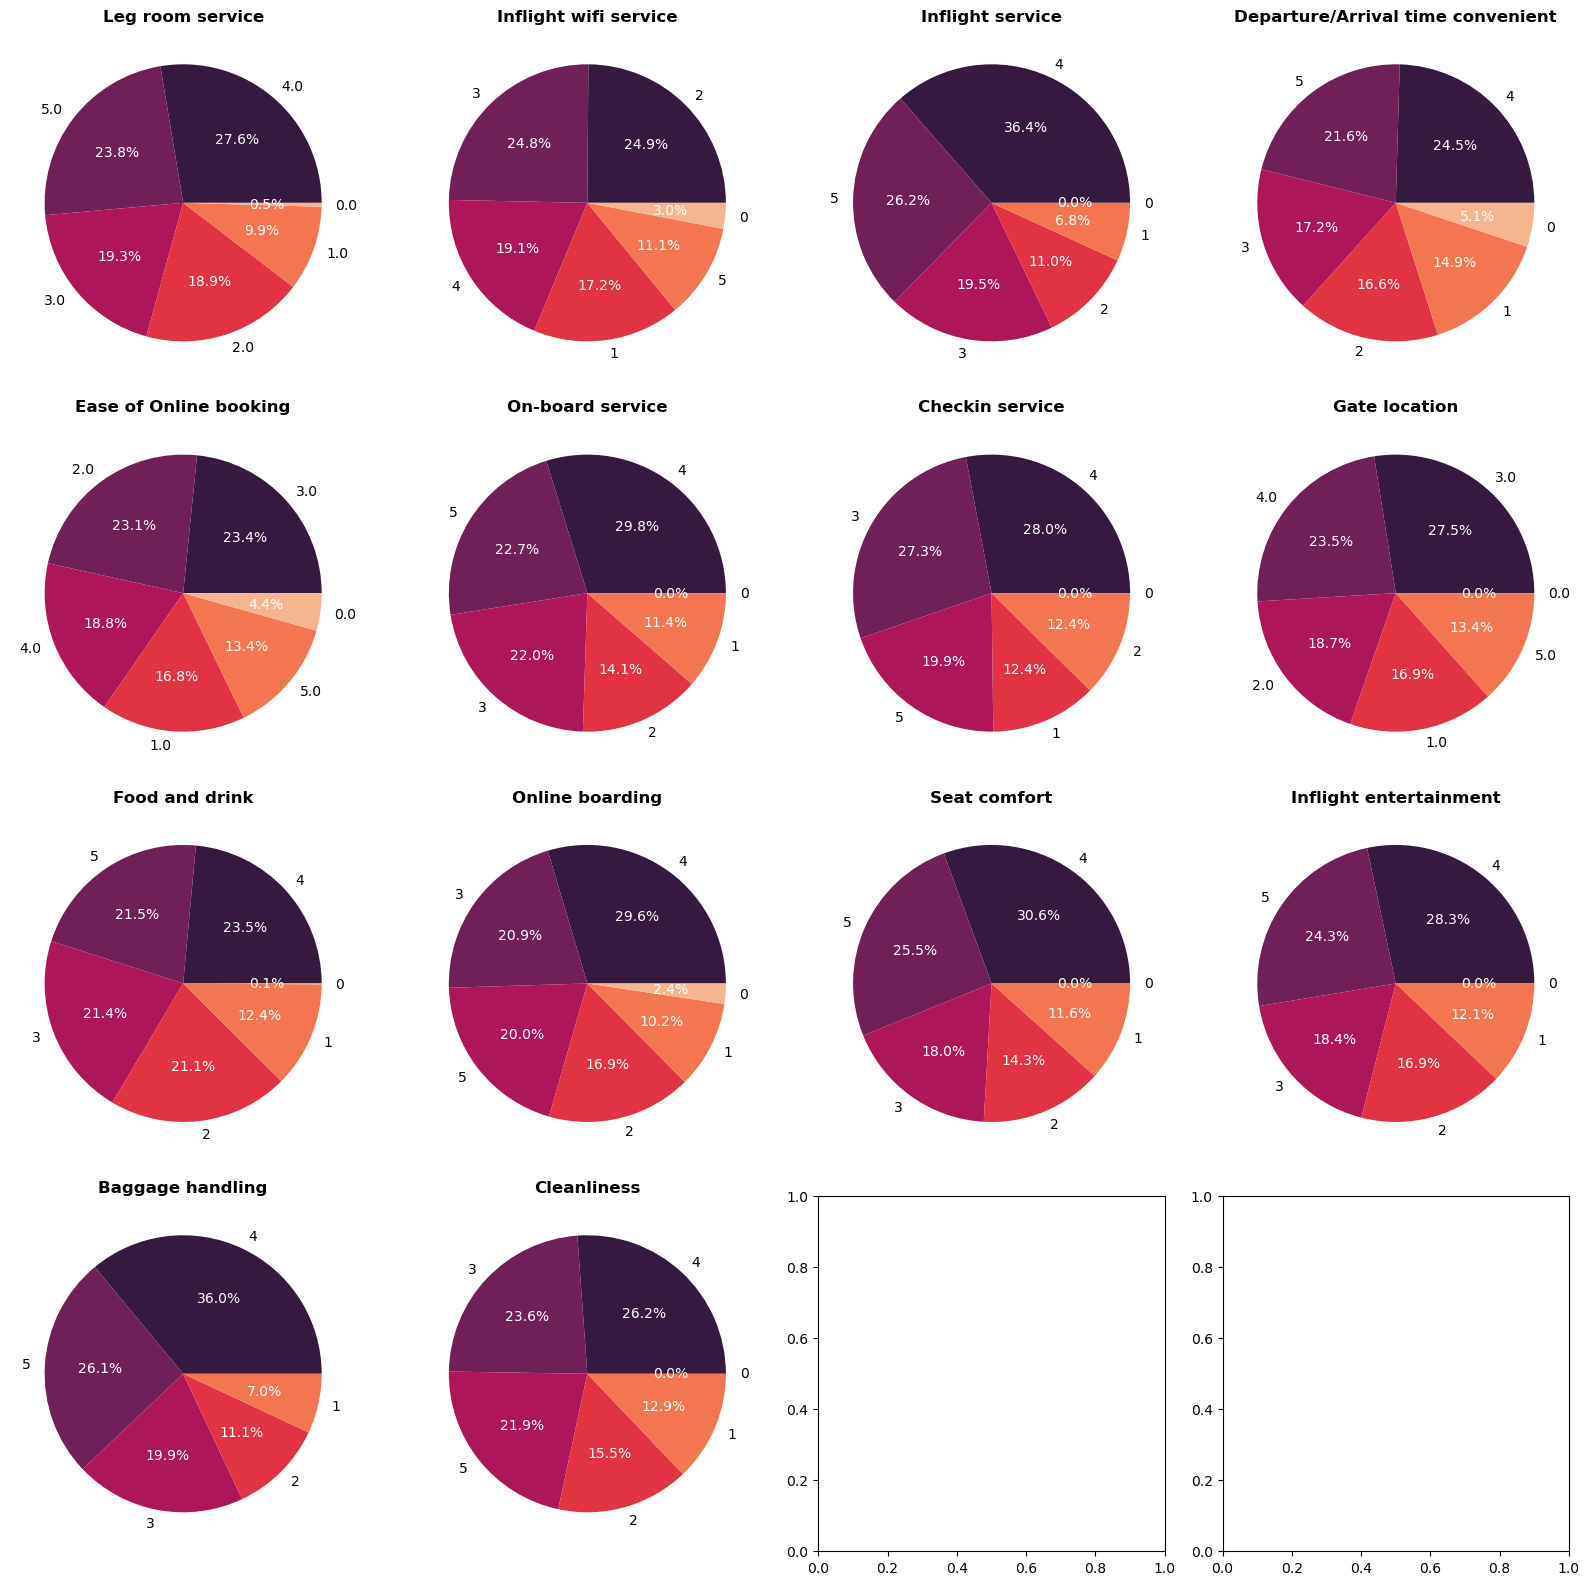

In [402]:
num_cat_variables = [var for var in cat_variables if var in num_variables]

colors = sns.color_palette("rocket", 6)

# Configuration pour deux graphiques par ligne
n_cols = 4
n_rows = (len(num_cat_variables) + n_cols - 1) // n_cols  # Calcul pour obtenir le nombre nécessaire de lignes

fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))  # Ajustez la hauteur si nécessaire
ax = ax.flatten()  # Aplatir le tableau d'axes si nécessaire

for i in range(len(num_cat_variables)):
    # Calcul des comptages de valeur
    value_counts = df_analysis[num_cat_variables[i]].value_counts()
    # Génération des indices pour les couleurs basées sur la longueur des catégories présentes
    num_colors = len(value_counts)
    # Sélection des couleurs
    selected_colors = colors[:num_colors]  # Assure que le nombre de couleurs est adéquat pour les catégories
    
    _, _, autotexts = ax[i].pie(value_counts, 
              labels=value_counts.index,
              colors=selected_colors,  # Utilisation des couleurs sélectionnées
              textprops={'fontsize': 10, 'color': 'black'}, 
              autopct='%1.1f%%'
              )
    for autotext in autotexts:
        autotext.set_color('white')
    ax[i].set_title(num_cat_variables[i], fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()



- Déterminer les variables qui suivent une distribution normale (parmi toutes les numériques) : Test de D'Agostino-Pearson

In [403]:
from scipy.stats import normaltest

def analyze_normality_large_samples(data, num_variables):
    gauss_variables = []
    no_gauss_variables = []
    
    for variable in num_variables:
        # On ignore les valeurs manquantes pour le test de normalité
        data_clean = data[variable].dropna()
        
        # Test de D'Agostino-Pearson
        stat, p_value = normaltest(data_clean)
        
        # Comparaison du p-value avec le seuil de 0.05
        if p_value > 0.05:
            gauss_variables.append(variable)
        else:
            no_gauss_variables.append(variable)
    
    return gauss_variables, no_gauss_variables

gauss_variables, no_gauss_variables = analyze_normality_large_samples(df_analysis, num_variables)

gauss_variables


[]

Aucune variable numérique n'a une distribution normale d'après le test de Pearson.

##### Matrice de Corrélation

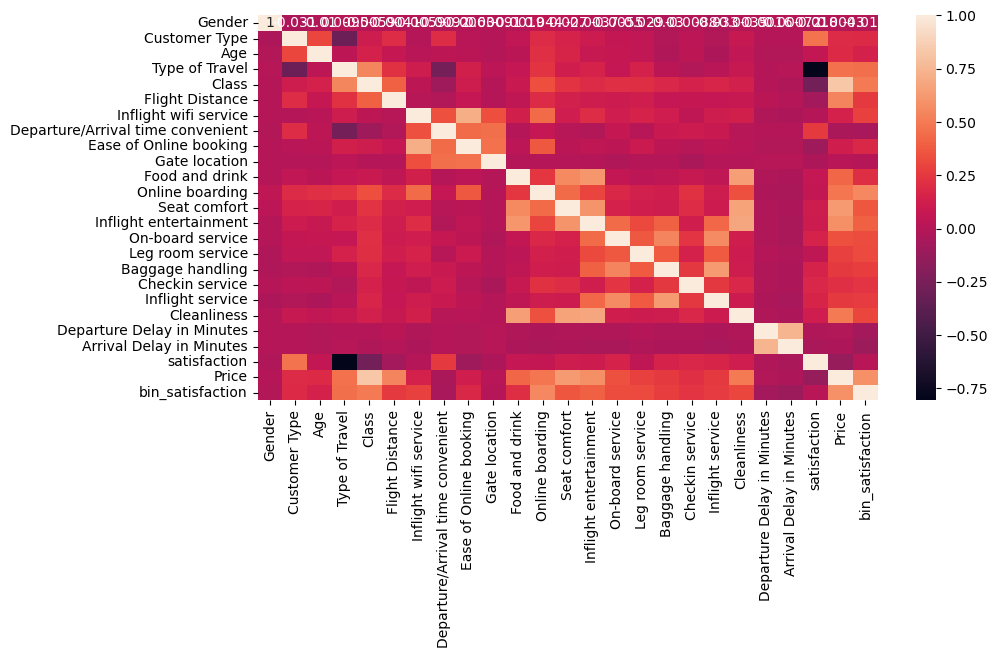

In [404]:
correlation_matrix = df_analysis.corr(method='spearman')
plt.subplots(figsize=(10,5))
sns.heatmap(data = correlation_matrix, annot=True)
plt.show()

* Variables corrélées aux variables cibles

In [405]:
def top_correlated_features(df, targets):
    # Calcul de la matrice de corrélation
    correlation_matrix = df.corr()
    
    # Boucler sur chaque variable cible
    for target in targets:
        if target in correlation_matrix.columns:
            # Obtenir les corrélations absolues avec la variable cible, exclure la variable elle-même
            correlations = correlation_matrix[target].drop(target).abs()
            # Trier les corrélations en ordre décroissant
            sorted_correlations = correlations.sort_values(ascending=False)
            # Afficher les 3 variables les plus corrélées
            top_vars = sorted_correlations.head(3)
            print(f"Top 3 variables les plus corrélées avec {target} sont:")
            for var, value in top_vars.items():
                print(f"{var}: {value}")
            print("\n")  # Ajoute une ligne vide pour la lisibilité entre les cibles
        else:
            print(f"La variable cible {target} n'est pas présente dans les colonnes du DataFrame.")

top_correlated_features(df_analysis, targets)

Top 3 variables les plus corrélées avec satisfaction sont:
Type of Travel: 0.8079717020386499
Customer Type: 0.4643204695303275
Class: 0.2783278390323553


Top 3 variables les plus corrélées avec Price sont:
Class: 0.8272986295703726
bin_satisfaction: 0.6142855674427875
Flight Distance: 0.5993997182911749


Top 3 variables les plus corrélées avec bin_satisfaction sont:
Price: 0.6142855674427875
Online boarding: 0.5017494207376334
Class: 0.4929465546927987




**Les variables corrélées aux variables cible sont susceptibles d'avoir un poids important dans le modèle de prédiction.**

##### Test d'indépendance: Test de Spearman

In [406]:
from scipy.stats import spearmanr

def spearman_correlation_summary(data, alpha=0.05):
    results = []

    for i, col1 in enumerate(data.columns):
        for col2 in data.columns[i+1:]:
            corr, p_val = spearmanr(data[col1], data[col2])
            
            results.append((col1, col2, corr, p_val))
    
    # Convertir la liste en DataFrame
    results_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Corrélation', 'P-value'])
    
    # Trier les résultats par la valeur absolue de la corrélation, ordre décroissant
    results_df.sort_values(by='Corrélation', key=abs, ascending=False, inplace=True)
    
    # Diviser les résultats en deux catégories
    dependent = results_df[results_df['P-value'] <= alpha]
    independent = results_df[results_df['P-value'] > alpha]
    
    return dependent, independent

dependent_vars, independent_vars = spearman_correlation_summary(df_analysis)

print("Dépendantes (Rejet de H0):")
print(dependent_vars)
print("\nIndépendantes (Pas de rejet de H0):")
print(independent_vars)

Dépendantes (Rejet de H0):
                 Variable 1             Variable 2  Corrélation   P-value
108                   Class                  Price     0.829574  0.000000
87           Type of Travel           satisfaction    -0.805941  0.000000
239  Inflight entertainment            Cleanliness     0.680963  0.000000
228            Seat comfort            Cleanliness     0.667978  0.000000
203          Food and drink            Cleanliness     0.647080  0.000000
..                      ...                    ...          ...       ...
16                   Gender        Checkin service    -0.008772  0.001571
5                    Gender  Inflight wifi service    -0.005932  0.032536
3                    Gender                  Class    -0.005858  0.034750
110         Flight Distance  Inflight wifi service     0.005676  0.040784
13                   Gender       On-board service    -0.005494  0.047691

[177 rows x 4 columns]

Indépendantes (Pas de rejet de H0):
                        

**Les paires de variables indépendantes l'une de l'autre sont plutôt rares : ce qui veut dire qu'elles n'ont pas de relation linéaire simple à percevoir.**

In [407]:
pd.DataFrame(df).to_csv(f"./df_analysis.csv", index=False)

## Prétraitement général des datas

### Traiter les anomalies [NON FONCTIONNEL]

A FAIRE !!! gates = un seul zéro = on peut le supprimer

In [408]:
# ! A faire 
# Retirer les anomalies
class OutlierRemover(BaseEstimator, TransformerMixin):
  # X= toutes les columns du df

  #columns: col à prende en compte pour détecter les anomalies (il ne faut prendre que les variables numériques)
  def __init__(self, columns, factor = 1.5):
      self.columns = columns
      self.factor = factor
      self.kept_indices = None
      
  # Retire les anomalies pour les variables numériques
  def remove_outliers(self, X):
      indices_to_keep = X.index
      l = []
      for c in self.columns:
          Q1 = X[c].quantile(0.25)
          Q3 = X[c].quantile(0.75)
          delta = Q3-Q1
          lower_bound = Q1 - self.factor*delta
          upper_bound = Q3 + self.factor*delta
          condition = (X[c] >= lower_bound) & (X[c] <= upper_bound)
          #On met dans une liste les valeurs qui ne sont pas des anomalies
          column = X[c].loc[ condition ]
          l.append( pd.Series(column) )
          
      res = pd.concat(l, axis=1, join = "inner")

      self.kept_indices = res.index

      
      return X.loc[self.kept_indices]

  def fit(self, X, y=None):
      return self

  def transform(self, X):
      return self.remove_outliers(X)

outlier_pipeline = Pipeline(steps= [("outliers", OutlierRemover(columns= df.columns, factor = 1.5))])